In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\The IQ-OTHNCCD lung cancer dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\The IQ-OTHNCCD lung cancer dataset/IQ-OTH_NCCD lung cancer dataset.txt
C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\The IQ-OTHNCCD lung cancer dataset/Bengin cases\Bengin case (1).jpg
C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\The IQ-OTHNCCD lung cancer dataset/Bengin cases\Bengin case (10).jpg
C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\The IQ-OTHNCCD lung cancer dataset/Bengin cases\Bengin case (100).jpg
C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\The IQ-OTHNCCD lung cancer dataset/Bengin cases\Bengin case (101).jpg
C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\The IQ-OTHNCCD lung cancer dataset/Bengin cases\Bengin case (102).jpg
C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\The IQ-OTHNCCD lung cancer dataset/Bengin cases\Bengin case (103).jpg
C:\Users\Dell\Downloads\capstone\lung cancer detection us

C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\The IQ-OTHNCCD lung cancer dataset/Normal cases\Normal case (1).jpg
C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\The IQ-OTHNCCD lung cancer dataset/Normal cases\Normal case (10).jpg
C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\The IQ-OTHNCCD lung cancer dataset/Normal cases\Normal case (100).jpg
C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\The IQ-OTHNCCD lung cancer dataset/Normal cases\Normal case (101).jpg
C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\The IQ-OTHNCCD lung cancer dataset/Normal cases\Normal case (102).jpg
C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\The IQ-OTHNCCD lung cancer dataset/Normal cases\Normal case (103).jpg
C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\The IQ-OTHNCCD lung cancer dataset/Normal cases\Normal case (104).jpg
C:\Users\Dell\Downloads\capstone\lung cancer detection usi

In [2]:
%config Completer.use_jedi = False
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns
import cv2
import random
import os
import imageio
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from collections import Counter

In [3]:
directory = r'C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\The IQ-OTHNCCD lung cancer dataset'
cases = ['Bengin cases', 'Malignant cases', 'Normal cases']

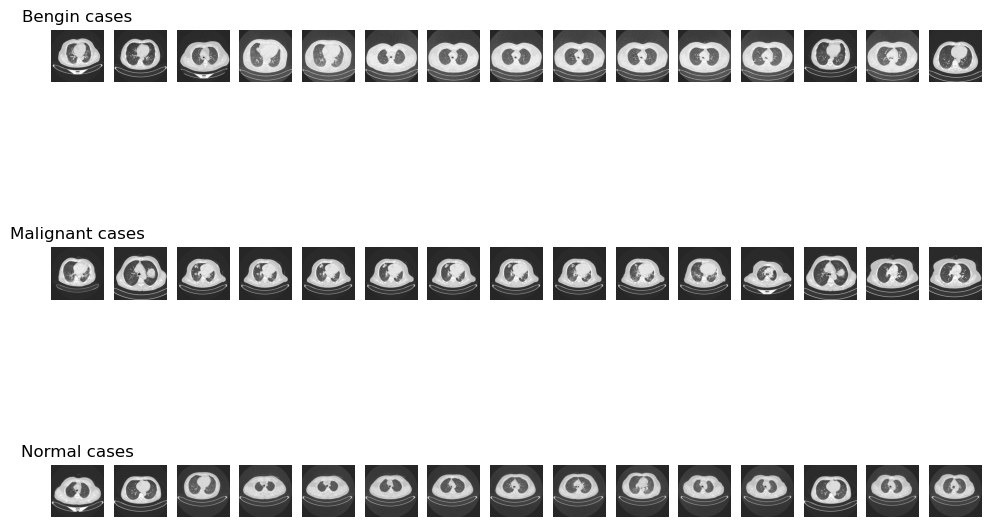

In [62]:
fig, ax = plt.subplots(nrows=3, ncols=15, figsize=(12, 8))

for index, case in enumerate(cases):
    img_list = os.listdir(os.path.join(directory, case))
    for i in range(15):
        img = cv2.imread(os.path.join(directory, case, img_list[i]))
        ax[index, i].imshow(img)
        ax[index, i].axis('off')
        if i == 0:
            ax[index, i].set_title(case)

plt.show()

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D

In [6]:
img_width, img_height = 224, 224
batch_size = 50

In [7]:
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)

In [8]:
training_data = datagen.flow_from_directory(directory, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical', subset='training', shuffle=True, classes=['Bengin cases', 'Malignant cases', 'Normal cases'])
testing_data = datagen.flow_from_directory(directory, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical', subset='validation', shuffle=True, classes=['Bengin cases', 'Malignant cases', 'Normal cases'])

Found 878 images belonging to 3 classes.
Found 219 images belonging to 3 classes.


In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(training_data, epochs=5, validation_data=testing_data)


Epoch 1/5
18/18 [==============================] - 211s 11s/step - loss: 1.4196 - accuracy: 0.4670 - val_loss: 0.9851 - val_accuracy: 0.5616
Epoch 2/5
18/18 [==============================] - 198s 11s/step - loss: 0.9407 - accuracy: 0.5285 - val_loss: 0.9559 - val_accuracy: 0.5342
Epoch 3/5
18/18 [==============================] - 112s 6s/step - loss: 0.8883 - accuracy: 0.5957 - val_loss: 0.9635 - val_accuracy: 0.5388
Epoch 4/5
18/18 [==============================] - 89s 5s/step - loss: 0.7855 - accuracy: 0.6743 - val_loss: 0.9439 - val_accuracy: 0.6073
Epoch 5/5
18/18 [==============================] - 92s 5s/step - loss: 0.7377 - accuracy: 0.7027 - val_loss: 0.9956 - val_accuracy: 0.6073


1/1 [==============================] - 0s 55ms/step
Malignant
1/1 [==============================] - 0s 47ms/step
Malignant
1/1 [==============================] - 0s 66ms/step
Malignant


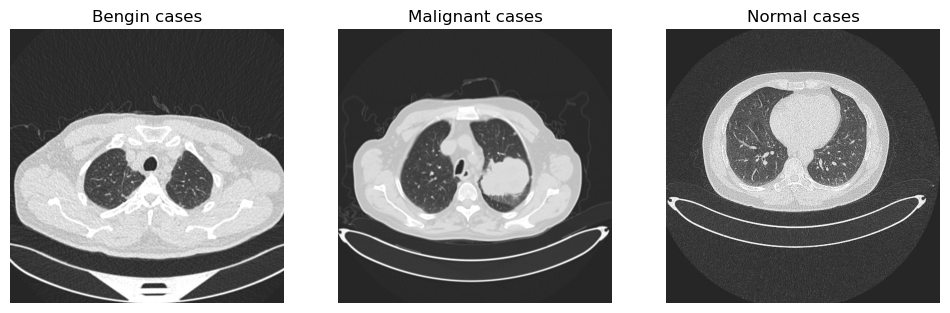

In [57]:
from tensorflow.keras.preprocessing import image

prediction_img = [r'C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (117).jpg',
                   r'C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (387).jpg', 
                  r'C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (100).jpg']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

for i in range(3):
    img = cv2.imread(prediction_img[i])
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title(cases[i])
    for i in prediction_img:
        img = image.load_img(i, target_size=(img_width, img_height))
        img_arr = image.img_to_array(img)
        img_arr= np.expand_dims(img_arr, axis=0)
        img_arr= img_arr/255
        predictions = model.predict(img_arr)
        predicted_class = np.argmax(predictions)
    if predicted_class == 0:
        print('Benign')
    elif predicted_class == 1:
        print('Malignant')
    else:
        print('Normal')

In [15]:
import pickle
filename = 'predict_model.pkl'
pickle.dump(model, open(filename,'wb'))

In [20]:
# Save the model with .h5 extension
model.save('my_model.h5')


In [26]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the saved model
model = tf.keras.models.load_model(r'C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\my_model.h5')

# Load the input image
img_path =   r'C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (327).jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.0

# Make the prediction
preds = model.predict(x)
class_idx = np.argmax(preds)
classes = ['Bengin cases', 'Malignant cases', 'Normal cases']
class_label = classes[class_idx]
confidence = preds[0][class_idx] * 100

# Print the predicted class and confidence
print("Predicted Class: {} with confidence {:.2f}%".format(class_label, confidence))


1/1 [==============================] - 0s 203ms/step
Predicted Class: Malignant cases with confidence 72.51%



#  diff pred code

1/1 [==============================] - 0s 281ms/step
Normal


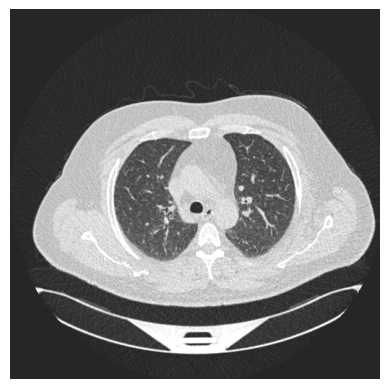

In [80]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np


# Load the saved model
model = load_model(r'C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\my_model.h5')

img_path =  r'C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (100).jpg'
img = cv2.imread(img_path)
plt.imshow(img)
plt.axis('off')

img = image.load_img(img_path, target_size=(224,224))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr / 255

predictions = model.predict(img_arr)
predicted_class = np.argmax(predictions)

if predicted_class == 0:
    print('Benign')
elif predicted_class == 1:
    print('Malignant')
else:
    print('Normal')


# diff pred code

In [73]:
import cv2
import numpy as np

# Load the image
img_path = r'C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\The IQ-OTHNCCD lung cancer dataset\Normal cases\Normal case (1).jpg'
img = cv2.imread(img_path)

# Resize the image to the desired dimensions
img_width, img_height = 224, 224
img = cv2.resize(img, (img_width, img_height))

# Convert the color space to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Normalize the pixel values to be between 0 and 1
img = img / 255.0


In [74]:
# Reshape the image to match the input shape of the model
img = img.reshape((1, img_width, img_height, 3))

# Make a prediction
prediction = model.predict(img)

# Print the prediction
print(prediction)


1/1 [==============================] - 0s 51ms/step
[[0.11195771 0.1678868  0.7201555 ]]


In [75]:
# Get the index of the highest probability
predicted_class_index = np.argmax(prediction)

# Map the index to the corresponding label
class_labels = ['Bengin', 'Malignant', 'Normal']
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label
print(predicted_class_label)


Normal


In [81]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

# Load the saved model
model = tf.keras.models.load_model(r'C:\Users\Dell\Downloads\capstone\lung cancer detection using cnn\my_model.h5')

# Take input image from user
img_path = input("Enter the path to the image file: ")
img = Image.open(img_path)

# Display the input image
plt.imshow(img)
plt.axis('off')
plt.show()

# Preprocess the input image
img = img.resize((224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.0

# Make the prediction
preds = model.predict(x)
class_idx = np.argmax(preds)
classes = ['Benign', 'Malignant', 'Normal']
class_label = classes[class_idx]
confidence = preds[0][class_idx] * 100

# Print the predicted class and confidence
print("Predicted Class: {} with confidence {:.2f}%".format(class_label, confidence))


Enter the path to the image file: z


FileNotFoundError: [Errno 2] No such file or directory: 'z'